In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import fetch_california_housing
housing_1 = fetch_california_housing()

In [ ]:
print(housing_1.DESCR)
print(housing_1.target)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
from sklearn.datasets import fetch_openml
housing_2 = fetch_openml(name="house_prices", as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
headers_1 = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

In [ ]:
df1 = pd.DataFrame(housing_1.data,columns = headers_1 )
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df1_test = pd.DataFrame(housing_1.target, columns = ['MedHouseValue'])
df1_test.head()

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
a = df1_test*100000
a

,MedHouseValue
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
# independent variables is df1
# taregt is a

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, a, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Regressor = LinearRegression()

In [ ]:
Regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting y for x_test
predictions = Regressor.predict(X_test)
predictions

array([[317202.54350977],
       [549616.19710252],
       [147501.9239279 ],
       ...,
       [309391.82629488],
       [234447.01766186],
       [247420.32153099]])

In [ ]:
y_test

,MedHouseValue
16086,406200.0
8816,500001.0
7175,122900.0
16714,209100.0
14491,500001.0
...,...
14439,276300.0
10823,225400.0
17019,417000.0
836,238500.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

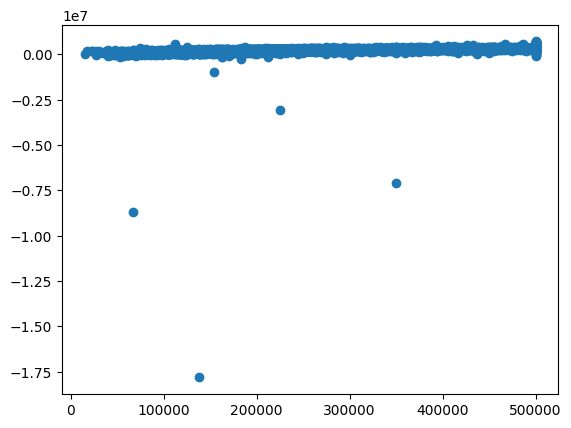

In [ ]:
# to check if the predicted values line up with the actual calues
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 56205.61497050925
MSE: 61606349870.056206
RMSE: 248206.264767947
